In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from model import LogRegCCD
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, recall_score, f1_score, roc_auc_score, balanced_accuracy_score,precision_score

In [11]:
arcene_train = pd.read_csv('ARCENE/arcene_train.data', header=None, sep='\s+')
arcene_train_y = pd.read_csv('ARCENE/arcene_train.labels', header=None)
arcene_train_y = arcene_train_y.squeeze()
arcene_valid = pd.read_csv('ARCENE/arcene_valid.data', header=None, sep='\s+')
arcene_valid_y = pd.read_csv('ARCENE/arcene_valid.labels', header=None)
arcene_valid_y = arcene_valid_y.squeeze()
mapping = {1: 0, -1: 1}
arcene_train_y = arcene_train_y.map(mapping).to_numpy()
arcene_valid_y = arcene_valid_y.map(mapping).to_numpy()


In [12]:
arcene_train = arcene_train.sample(n=450, axis=1, random_state=42)
arcene_valid = arcene_valid.sample(n=450, axis=1, random_state=42)
#reducing number of features 

In [13]:
lambdas = np.linspace(10, 0.1, 10) # 10 lambdas from 10 to 0.01
model = LogRegCCD(lambdas)
model.fit(arcene_train, arcene_train_y)
model.validate(arcene_valid, arcene_valid_y)

10.0


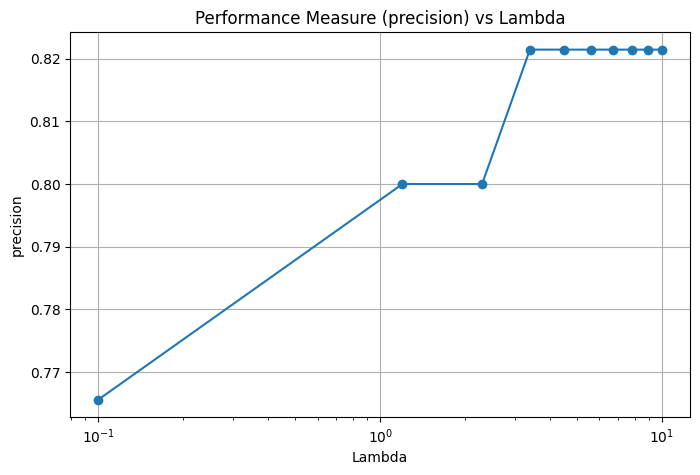

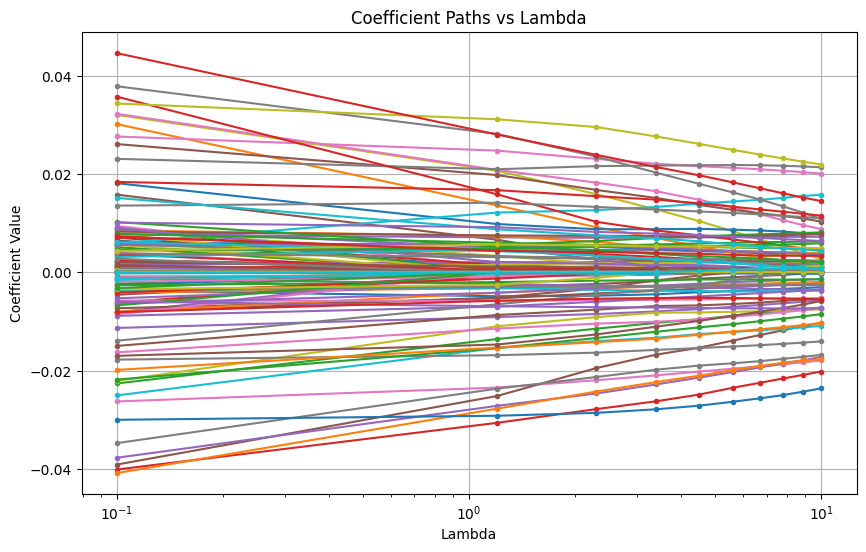

In [14]:
print(model.best_lambda_)
model.plot(arcene_valid, arcene_valid_y, measure="precision")
model.plot_coefficients()

In [15]:
lambdas = [0]
model_l_0 = LogRegCCD(lambdas)
model_l_0.fit(arcene_train, arcene_train_y)
model_l_0.validate(arcene_valid, arcene_valid_y)

0
[0     9.999994e-01
1     9.631712e-17
2     1.000000e+00
3     4.845333e-37
4     3.819772e-02
          ...     
95    1.000000e+00
96    1.000000e+00
97    1.664421e-07
98    7.497185e-05
99    8.622419e-13
Length: 100, dtype: float64]
[[1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1
  1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 0 0 0 1 0 1 1 1 1 1 0 1 1 1 1
  0 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 0 0 0]]


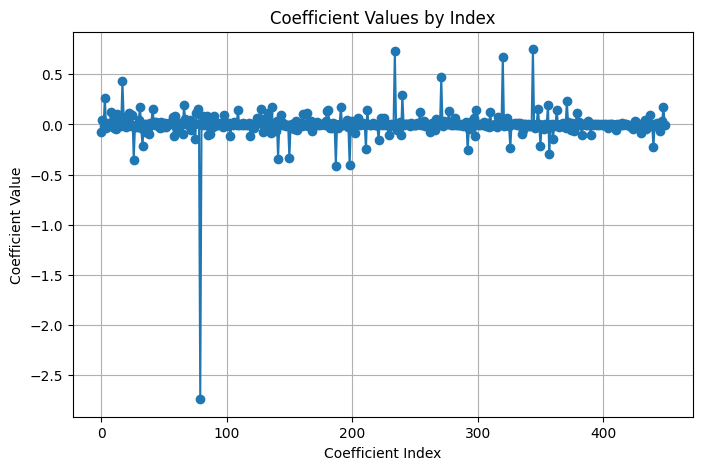

In [16]:
import matplotlib.pyplot as plt
print(model_l_0.best_lambda_)
print(model_l_0.probas_)
print((np.array(model_l_0.probas_) >= 0.5).astype(int))


coefs = model_l_0.coef_path_[0]
indexes = np.arange(0, len(coefs))

plt.figure(figsize=(8, 5))
plt.plot(indexes, coefs, marker='o', linestyle='-')
plt.xlabel("Coefficient Index")
plt.ylabel("Coefficient Value")
plt.title("Coefficient Values by Index")
plt.grid(True)
plt.show()

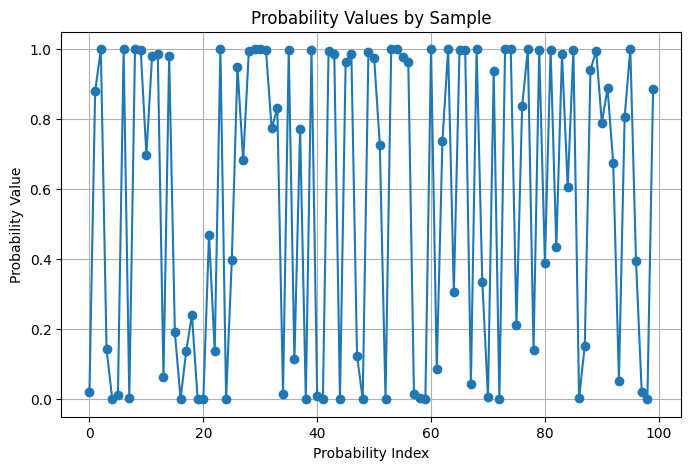

In [17]:
indexes = np.arange(0, len(model_l_0.probas_[0]))
plt.figure(figsize=(8, 5))
plt.plot(indexes, model.probas_[0], marker='o', linestyle='-')
plt.xlabel("Probability Index")
plt.ylabel("Probability Value")
plt.title("Probability Values by Sample")
plt.grid(True)
plt.show()


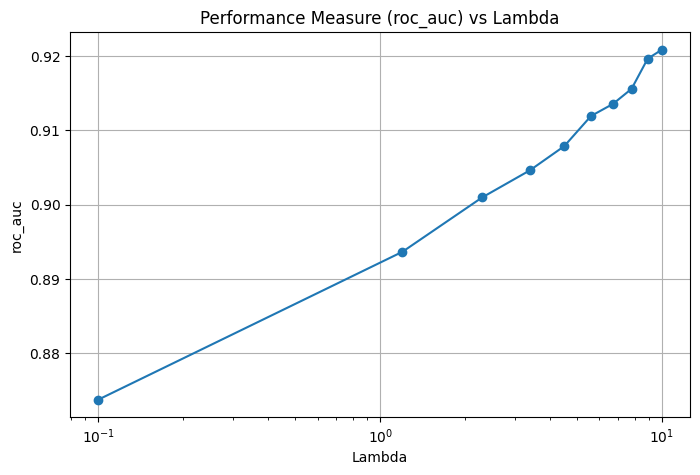

In [22]:
model.plot(arcene_valid, arcene_valid_y, measure="roc_auc")

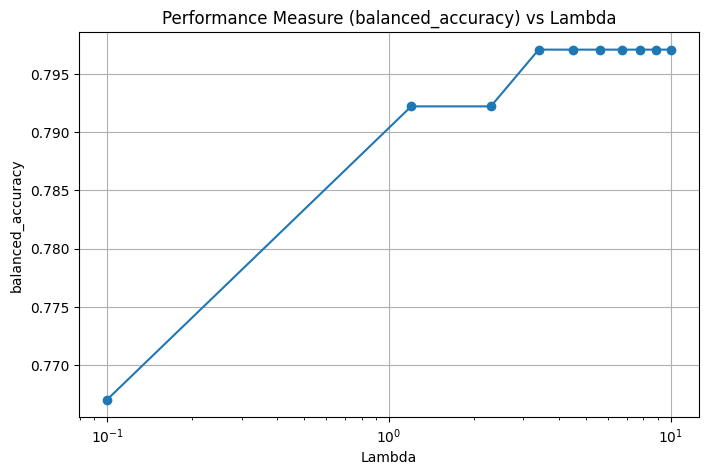

In [24]:
model.validate(arcene_valid, arcene_valid_y, measure="balanced_accuracy")
model.plot(arcene_valid, arcene_valid_y, measure="balanced_accuracy")

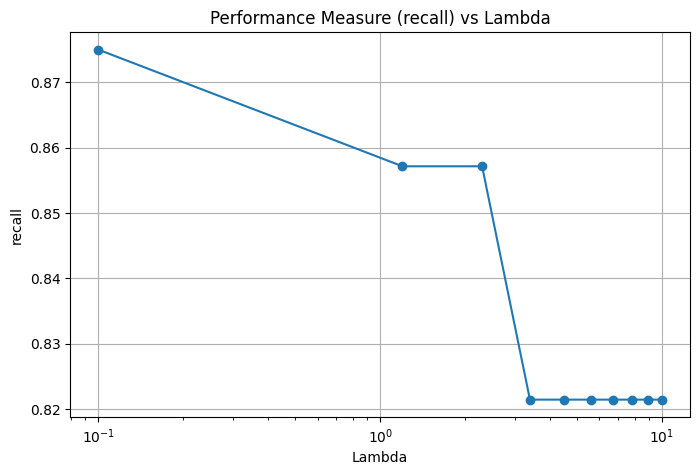

In [25]:
model.validate(arcene_valid, arcene_valid_y, measure="recall")
model.plot(arcene_valid, arcene_valid_y, measure="recall")

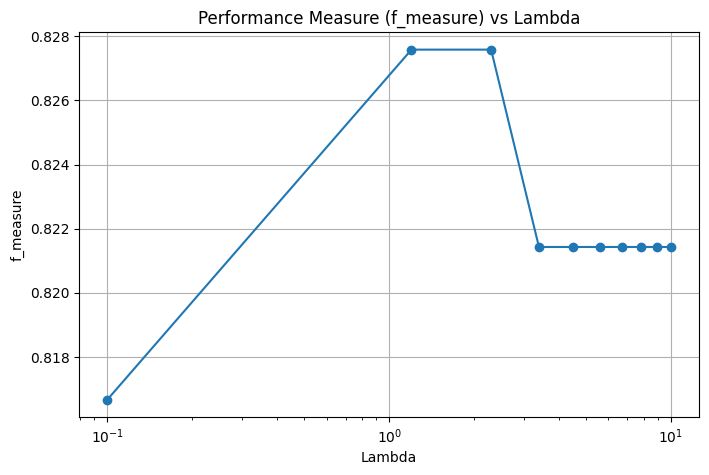

In [26]:
model.validate(arcene_valid, arcene_valid_y, measure="f_measure")
model.plot(arcene_valid, arcene_valid_y, measure="f_measure")

In [27]:
modelLR = LogisticRegression(penalty=None)
modelLR.fit(arcene_train, arcene_train_y)

LogisticRegression(penalty=None)

In [28]:
print(modelLR.coef_)
print(model.best_coef_)

[[ 4.85966906e-02  4.12515314e-02  2.44401972e-02  2.46609442e-02
  -2.46946121e-02 -2.72678941e-02 -5.78062908e-02  3.87283790e-02
   1.13695589e-02  4.30261804e-02 -1.56856517e-02  2.32768580e-03
  -3.81077029e-02  5.73271960e-05  5.16111682e-03 -2.40815720e-02
   1.54372606e-03  7.88624113e-04  3.81841279e-03 -1.40391725e-02
  -3.32848030e-03  1.37605397e-03  2.42715491e-02 -9.04909889e-03
  -4.73483116e-02  2.61780508e-02 -3.58552463e-03  1.63819461e-02
   2.29353341e-02  4.84726302e-03  9.96857995e-03  1.16601777e-02
   1.58808460e-02 -4.70856162e-02  6.61353222e-02 -1.44673224e-02
  -4.26120808e-03 -1.56446947e-02 -2.61588945e-02 -1.46580527e-02
   2.11539740e-02  1.30423767e-03  7.11371232e-03 -2.78427422e-02
  -2.72109732e-03 -5.68459684e-02  1.25156389e-02 -3.15259930e-03
  -2.72150519e-03  4.02148719e-03  2.82231282e-02 -1.93986741e-03
   1.22209660e-02 -2.17578510e-02  1.27930330e-02  5.13628065e-03
  -1.41101359e-03  3.78129399e-03  5.24747255e-03  1.86149389e-02
  -3.19554

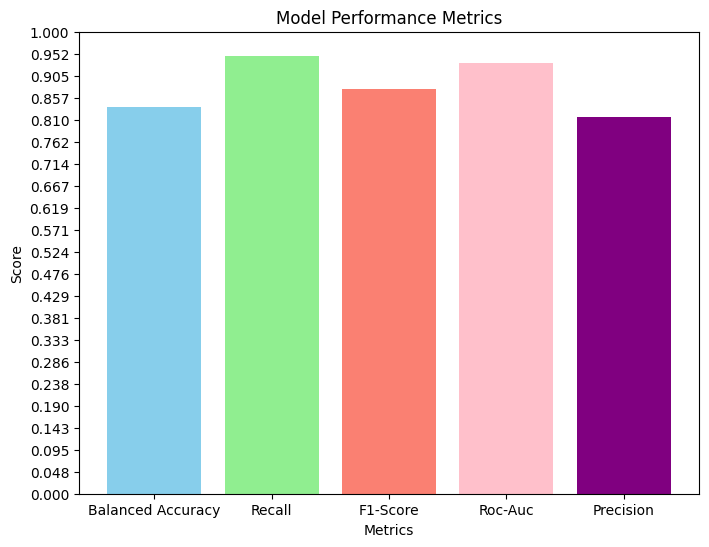

In [29]:
y_pred = modelLR.predict(arcene_valid)
y_prob = modelLR.predict_proba(arcene_valid)[:, 1] 

balanced_acc = balanced_accuracy_score(arcene_valid_y, y_pred)
recall = recall_score(arcene_valid_y, y_pred, average='binary')
f1 = f1_score(arcene_valid_y, y_pred, average='binary')
roc_auc = roc_auc_score(arcene_valid_y, y_prob)
precision = precision_score(arcene_valid_y, y_pred, average='binary')

metrics = ['Balanced Accuracy', 'Recall', 'F1-Score', 'Roc-Auc', 'Precision']
values = [balanced_acc, recall, f1, roc_auc, precision]

plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['skyblue', 'lightgreen', 'salmon', 'pink', 'purple'])
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Model Performance Metrics')
plt.ylim([0, 1])  
plt.yticks(np.linspace(0, 1, 22))  

plt.show()

